## Customer Lifetime Value Performannce

### Problem Statement 

This project aims to predict the value of customer 

### Data Collection 

Data source - 
The data consists of 10 columns and 584 rows.

### Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


### Import Data as Dataframe

In [17]:
df = pd.read_csv('data/NEW DATA .csv')

df.head()

,InvoiceNo,Stock Code,Description,Quantity,InvoiceDate,UnitPrice,Customer ID,Country,Age,Salary
0,489895,22130,PARTY CONE CHRISTMAS DECORATION,12,12/3/09 7:25 AM,0.85,12779,Poland,23,56463
1,489895,21432,SET OF 3 CASES WOODLAND DESIGN,2,12/3/09 7:25 AM,5.95,12779,Poland,23,56463
2,489895,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/3/09 7:25 AM,1.25,12779,Poland,23,56463
3,489895,37448,CERAMIC CAKE DESIGN SPOTTED MUG,24,12/3/09 7:25 AM,1.49,12779,Poland,23,56463
4,489895,37494A,FAIRY CAKE CERAMIC BUTTER DISH,6,12/3/09 7:25 AM,2.95,12779,Poland,23,56463


### Data Checks to perform

In [18]:
df.shape

(583, 10)

In [19]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convert InvoiceDate to datetime format

In [20]:
df.isna().sum()

InvoiceNo      0
Stock Code     0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Customer ID    0
Country        0
Age            0
Salary         0
dtype: int64

No missing values 

In [21]:
df.duplicated().sum()

0

No duplicate values

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    583 non-null    int64         
 1   Stock Code   583 non-null    object        
 2   Description  583 non-null    object        
 3   Quantity     583 non-null    int64         
 4   InvoiceDate  583 non-null    datetime64[ns]
 5   UnitPrice    583 non-null    float64       
 6   Customer ID  583 non-null    int64         
 7   Country      583 non-null    object        
 8   Age          583 non-null    int64         
 9   Salary       583 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 45.7+ KB


In [23]:
df.nunique()

InvoiceNo       21
Stock Code     446
Description    459
Quantity        24
InvoiceDate     27
UnitPrice       41
Customer ID      8
Country          6
Age              8
Salary           8
dtype: int64

In [24]:
df.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,Customer ID,Age,Salary
count,583.000000,583.000000,583,583.000000,583.000000,583.000000,583.000000
mean,522119.198971,11.903945,2010-08-29 03:15:28.816466432,2.617256,13027.132075,39.190395,60573.229846
min,489895.000000,1.000000,2009-12-03 07:25:00,0.210000,12347.000000,23.000000,23491.000000
25%,514319.000000,6.000000,2010-07-01 13:46:00,1.250000,12653.000000,24.000000,29134.000000
50%,523305.000000,12.000000,2010-09-07 13:42:00,1.650000,12744.000000,38.000000,56463.000000
75%,531495.000000,12.000000,2010-10-31 14:20:00,2.950000,12779.000000,53.000000,97197.000000
max,537626.000000,72.000000,2010-12-07 14:57:00,40.000000,15390.000000,67.000000,98522.000000
std,11048.451535,9.386199,NaN,2.823694,932.226313,14.473810,29115.339258


 The mean age of customers in 39. While majority of them ranging from 24 to 53.
 An increase in quantity has an increase in price.

In [25]:
print("Categories in 'Country' variable:  ", end=" ")
print(df['Country'].unique())

print("Categories in 'Age' variable:  ", end=" ")
print(df['Age'].unique())

Categories in 'Country' variable:   ['Poland' 'Singapore' 'Israel' 'Brazil' 'Canada' 'Iceland']
Categories in 'Age' variable:   [23 41 38 24 37 67 53 31]


In [26]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['InvoiceNo', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Customer ID', 'Age', 'Salary']

We have 3 categorical features : ['Stock Code', 'Description', 'Country']


In [27]:
# Calculate total spent per transaction
df['TotalSpent'] = df['Quantity'] * df['UnitPrice'] 
# Create a customer type variable based on total spent
df['CustomerType'] = pd.cut(df['TotalSpent'], bins=[0, 10, 50, 100, float('inf')], 
                              labels=['Low', 'Medium', 'High', 'Very High'])  

In [28]:
df.head()

,InvoiceNo,Stock Code,Description,Quantity,InvoiceDate,UnitPrice,Customer ID,Country,Age,Salary,TotalSpent,CustomerType
0,489895,22130,PARTY CONE CHRISTMAS DECORATION,12,2009-12-03 07:25:00,0.85,12779,Poland,23,56463,10.20,Medium
1,489895,21432,SET OF 3 CASES WOODLAND DESIGN,2,2009-12-03 07:25:00,5.95,12779,Poland,23,56463,11.90,Medium
2,489895,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-03 07:25:00,1.25,12779,Poland,23,56463,30.00,Medium
3,489895,37448,CERAMIC CAKE DESIGN SPOTTED MUG,24,2009-12-03 07:25:00,1.49,12779,Poland,23,56463,35.76,Medium
4,489895,37494A,FAIRY CAKE CERAMIC BUTTER DISH,6,2009-12-03 07:25:00,2.95,12779,Poland,23,56463,17.70,Medium


### Exploring Data

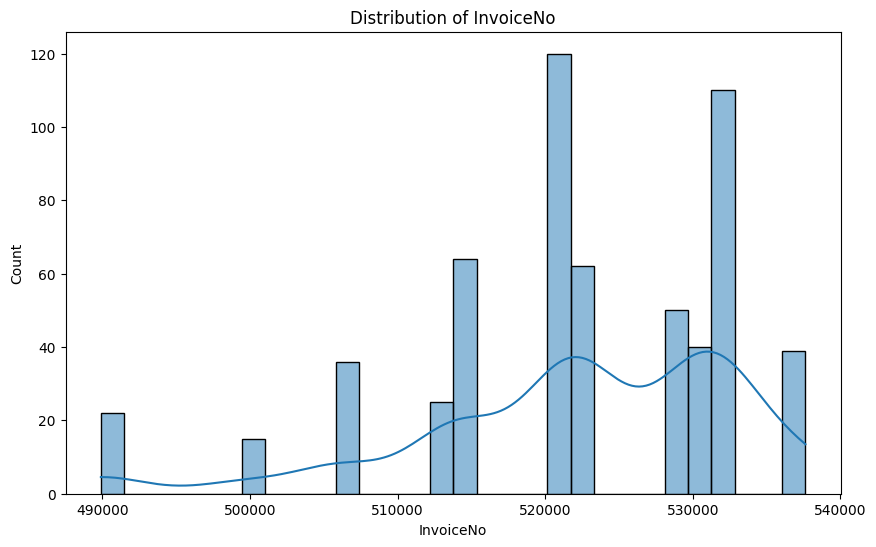

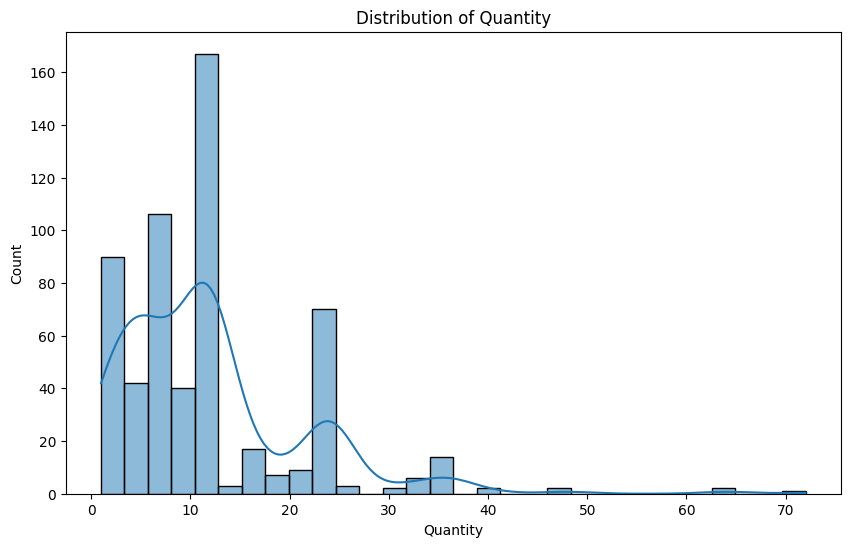

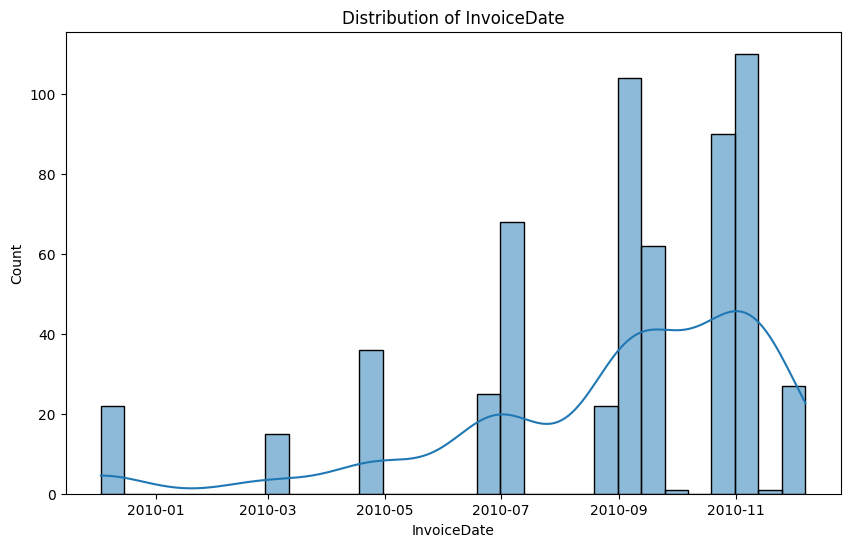

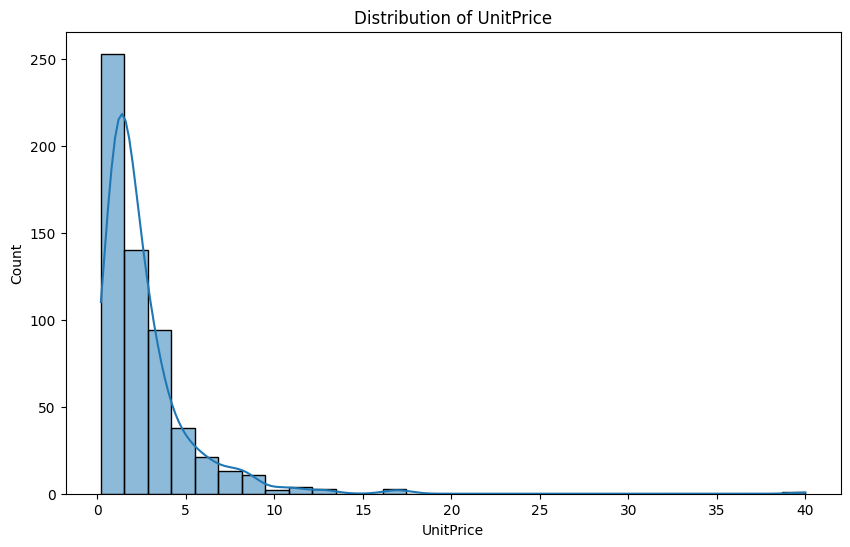

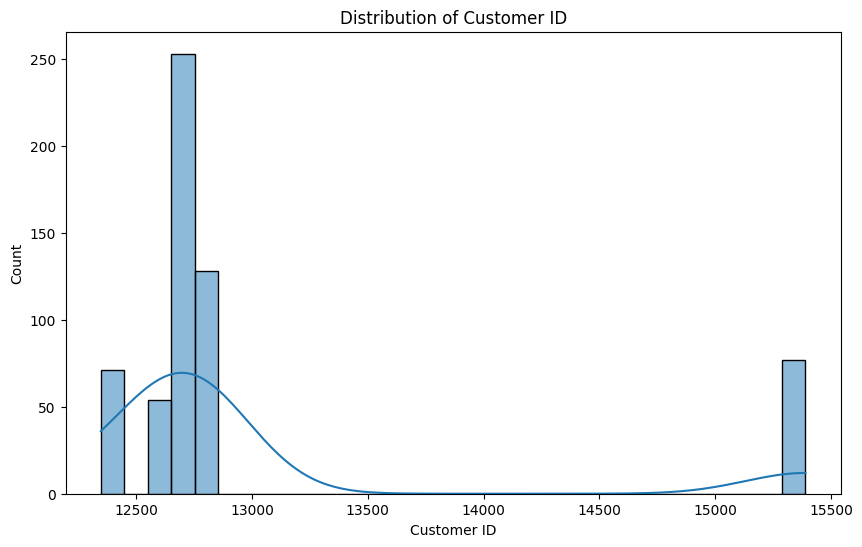

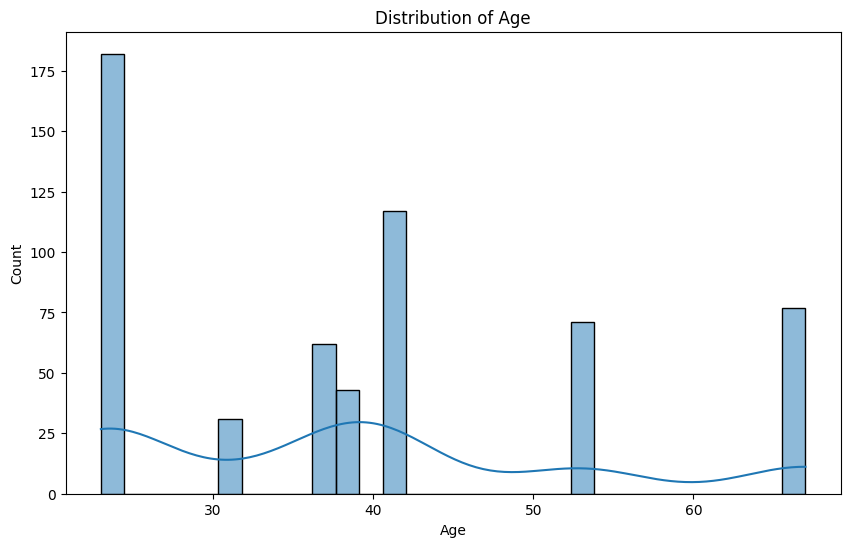

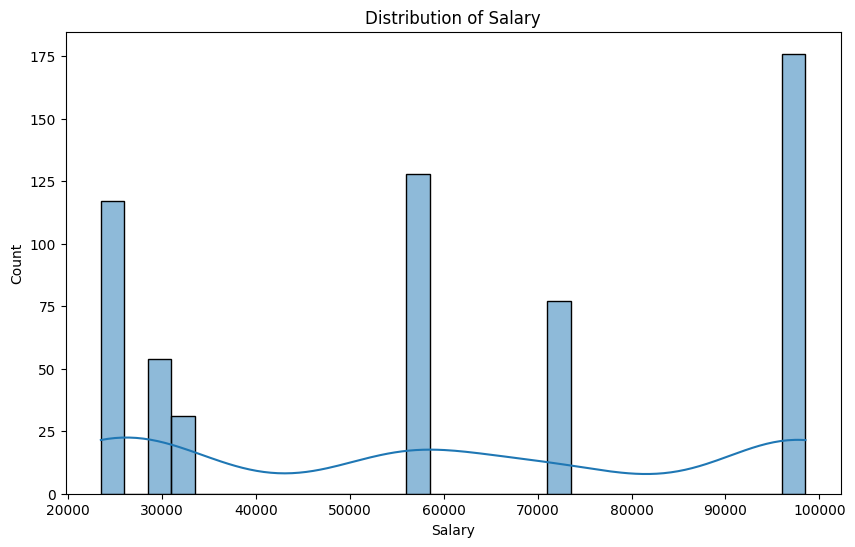

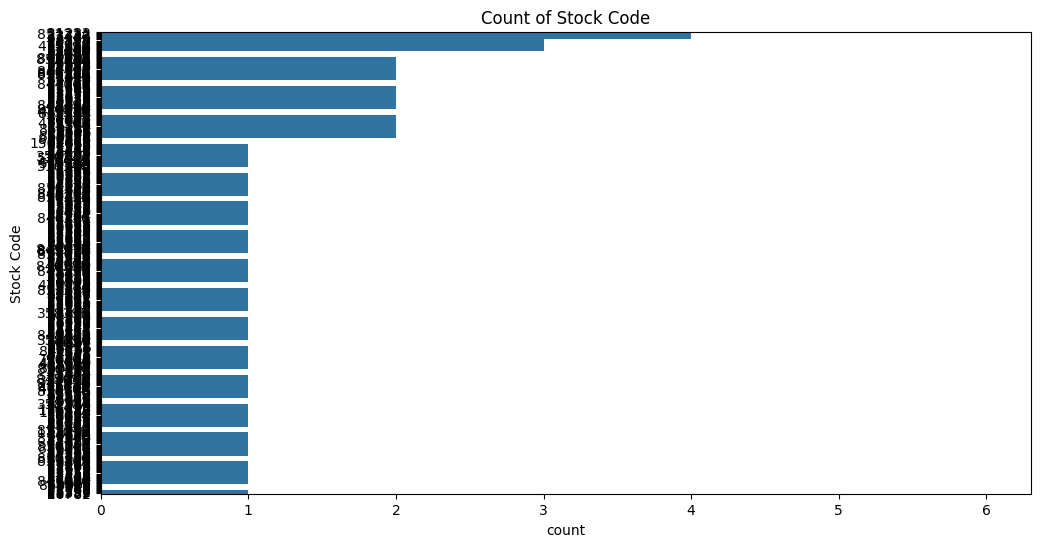

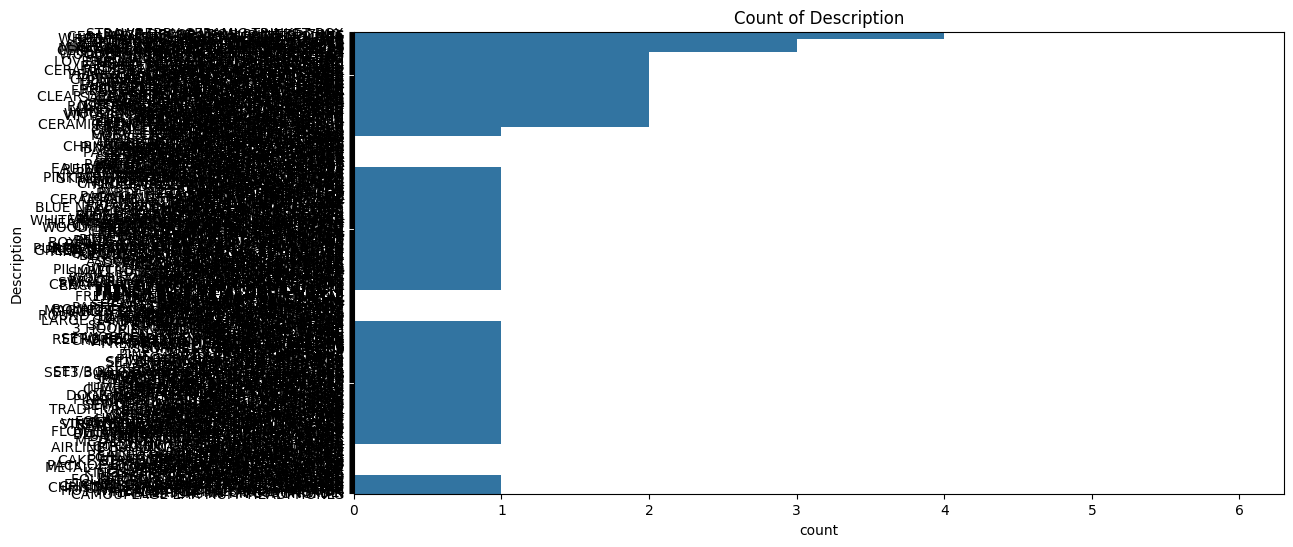

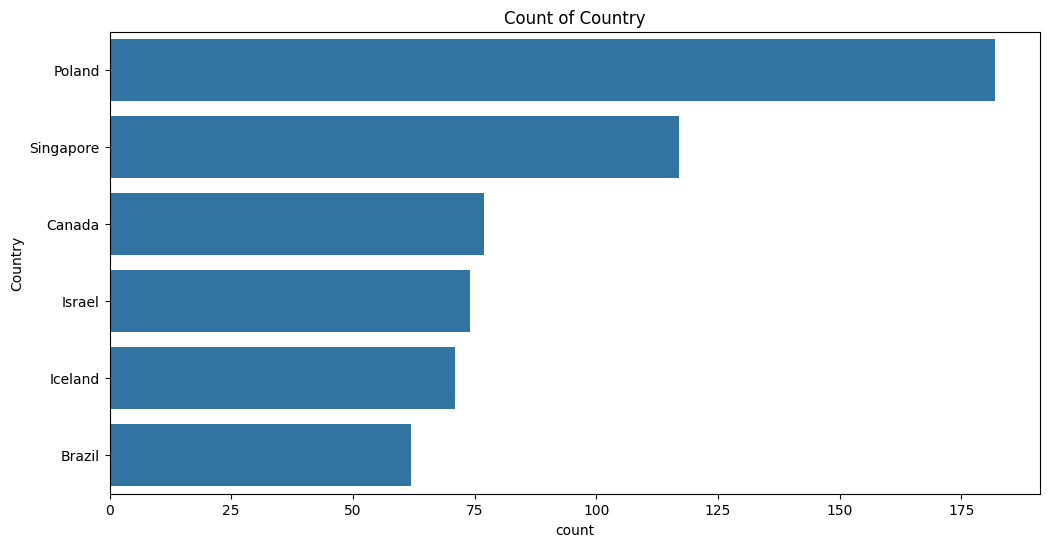

In [29]:
#Univariate Analysis 

#Distribution of Numerical features 
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()
#Distribution of Categorical features 
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Count of {feature}')
    plt.show()

The count of the roduct sold decreases as the unit price increases 

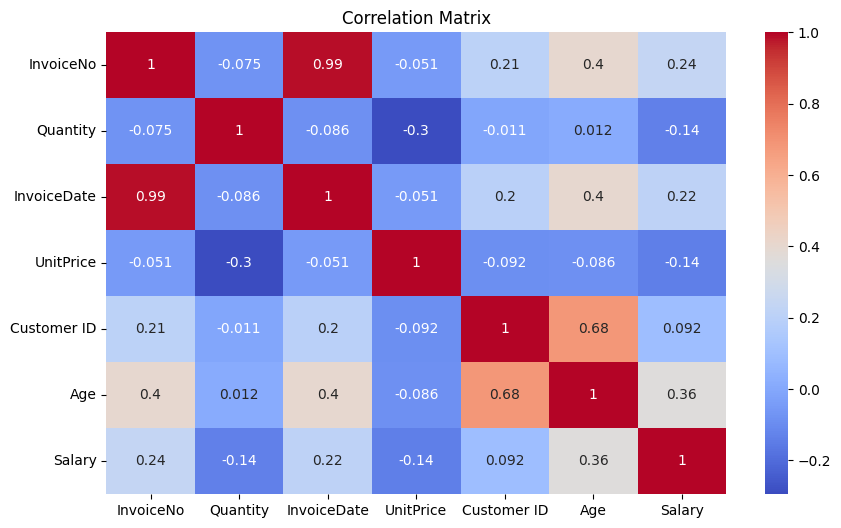

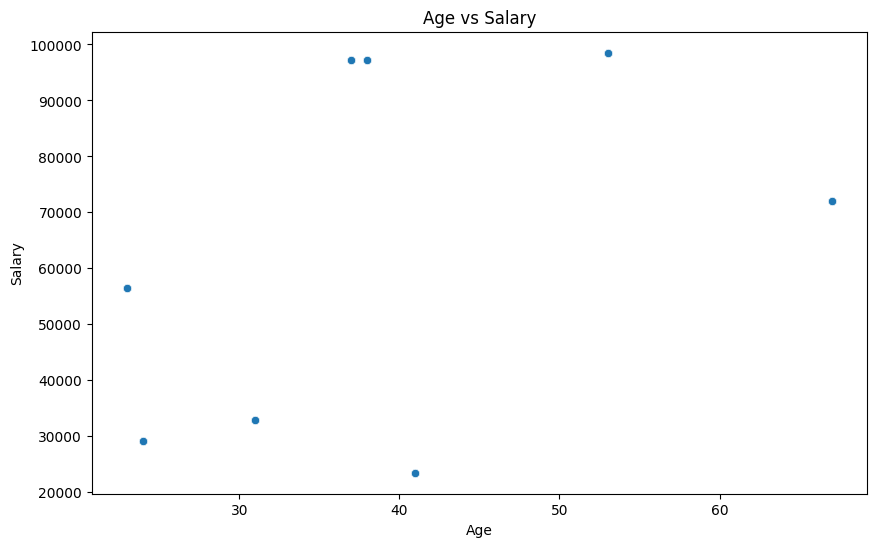

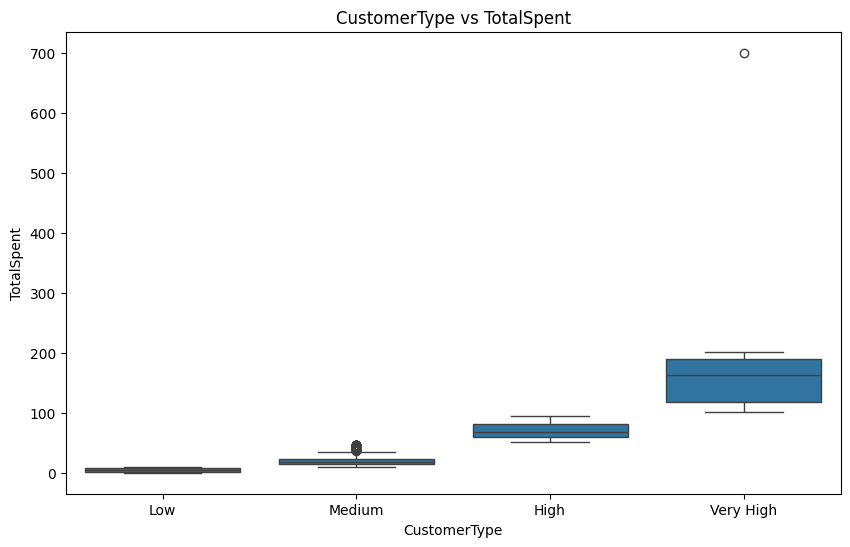

In [30]:
# Bivariate Analysis

# Correlation matrix for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot: Age vs Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Salary'])
plt.title('Age vs Salary')
plt.show()

# Box plot: CustomerType vs TotalSpent
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CustomerType'], y=df['TotalSpent'])
plt.title('CustomerType vs TotalSpent')
plt.show()


There is a relationship between Age abd Salary.
Many outliers present in customers having Medium Total Spent 

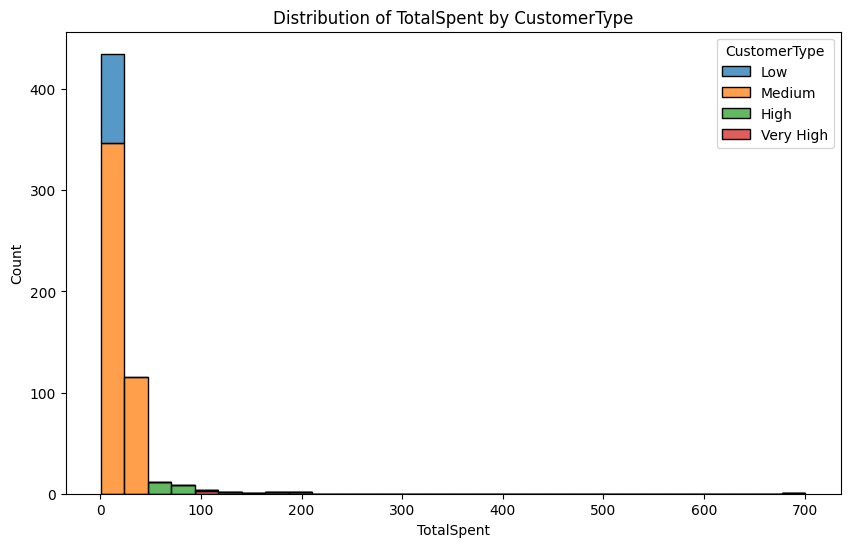

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalSpent', hue='CustomerType', multiple='stack', bins=30)
plt.title('Distribution of TotalSpent by CustomerType')
plt.show()

Customers spending the lowest are high in number.

#### Time Series Analysis 

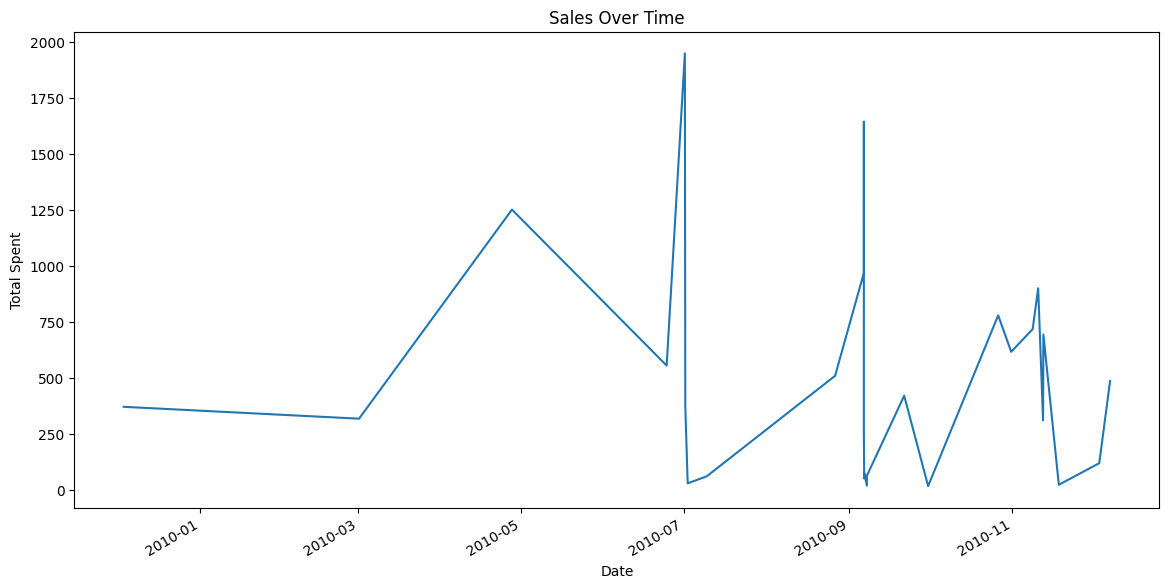

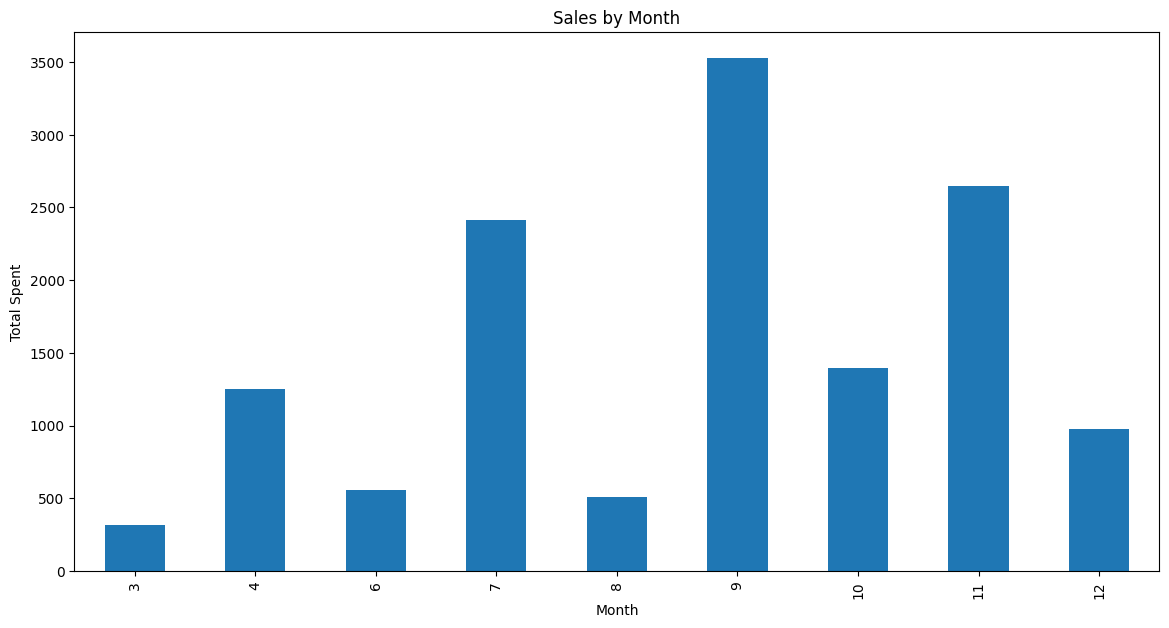

In [34]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract date parts
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

# Sales over time
plt.figure(figsize=(14, 7))
df.groupby('InvoiceDate')['TotalSpent'].sum().plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Spent')
plt.show()

# Sales by Month
plt.figure(figsize=(14, 7))
df.groupby('Month')['TotalSpent'].sum().plot(kind='bar')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Spent')
plt.show()


Month September had seen the highest sale and March the lowest.

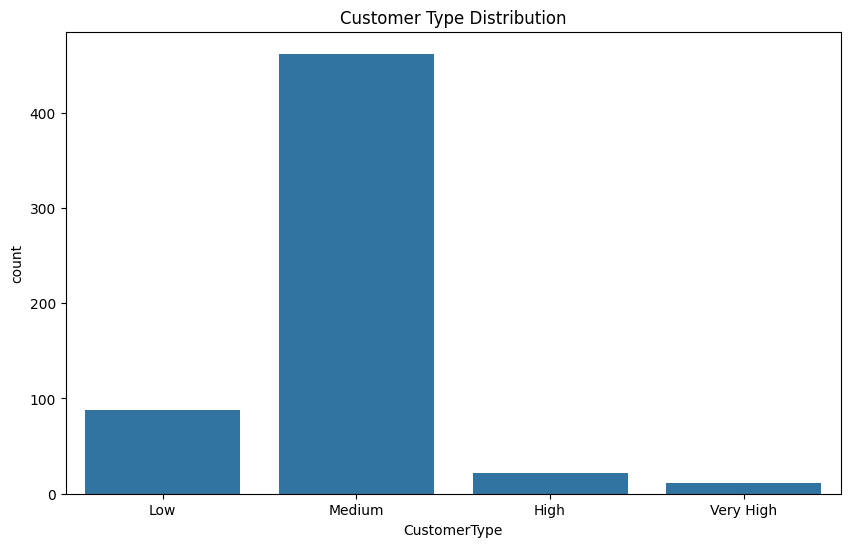

In [40]:
# Assuming 'CustomerType' is already created as shown in the initial code
plt.figure(figsize=(10, 6))
sns.countplot(x=df['CustomerType'])
plt.title('Customer Type Distribution')
plt.show()

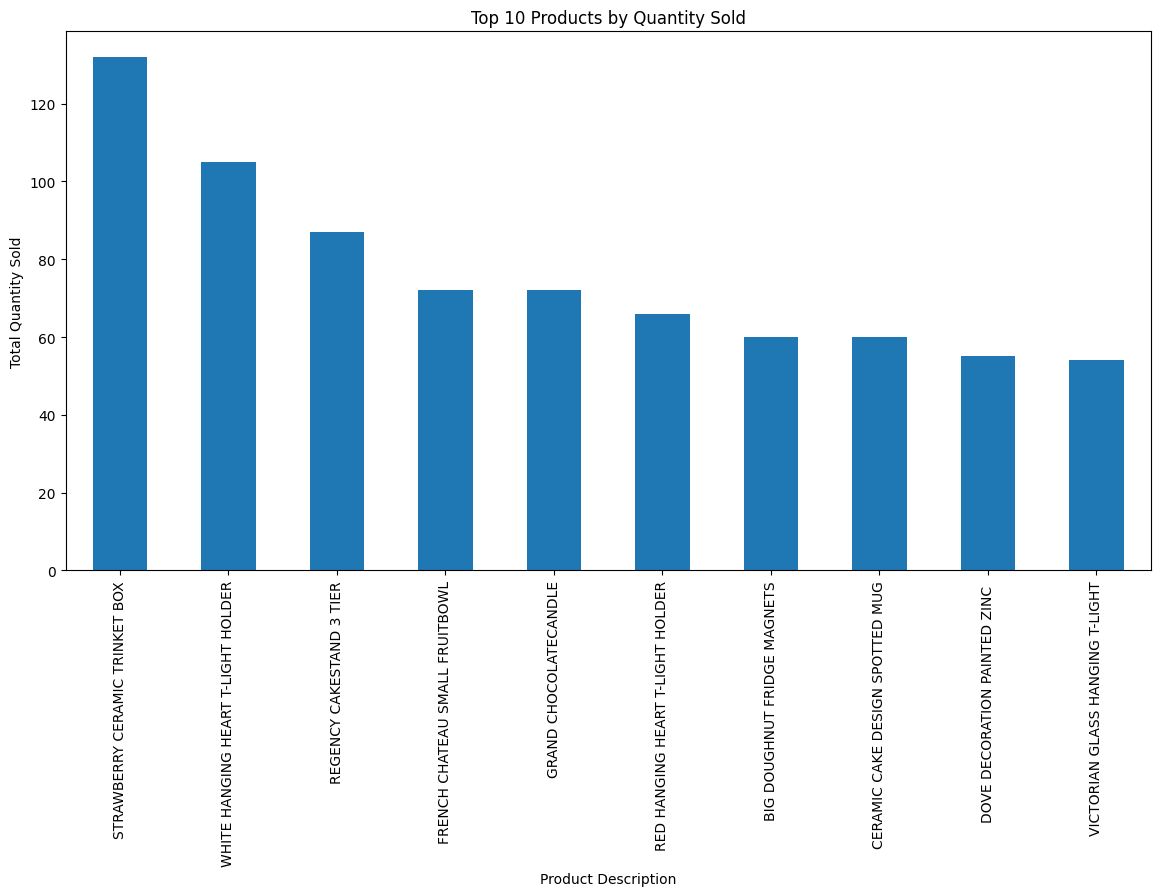

In [36]:
# Top 10 products by quantity sold
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 7))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.show()

Strawberry Box is the highest selling product.

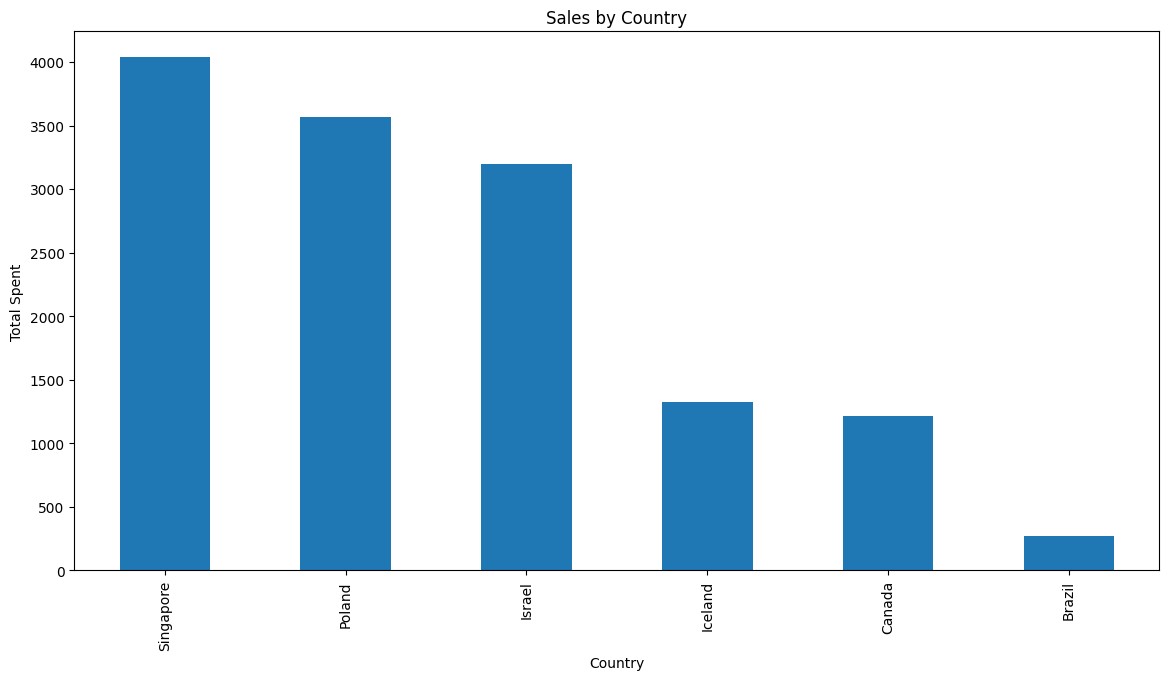

In [37]:
# Sales by Country
sales_by_country = df.groupby('Country')['TotalSpent'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 7))
sales_by_country.plot(kind='bar')
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Spent')
plt.show()

Singapore is the highest product selling country while Brazil is the lowest.